In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_uniform import *
from NN_library.AutoUnet.train_AutoUnet_noise import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset_uniform()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

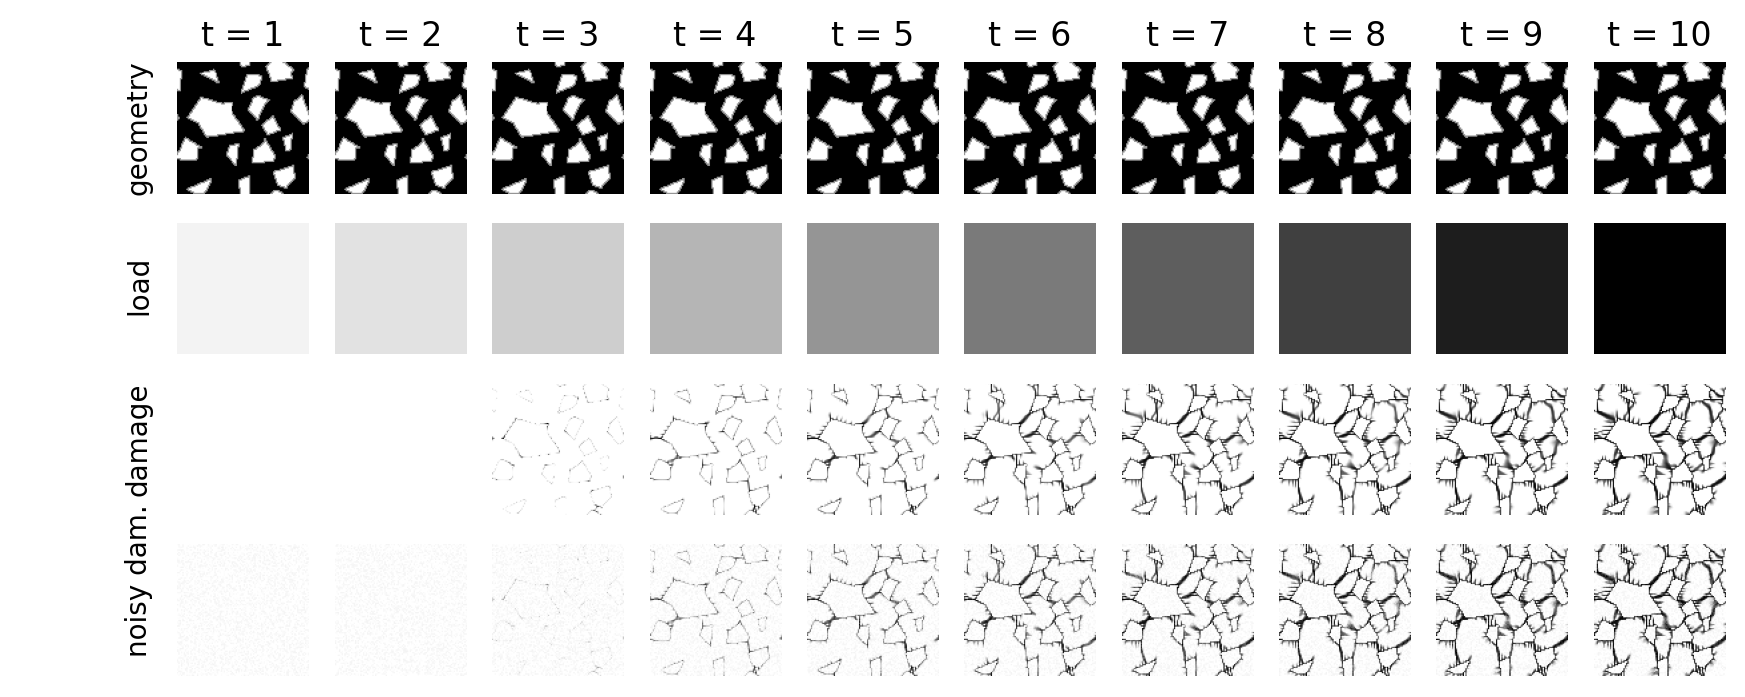

In [3]:
fig, axs = plt.subplots(nrows=4, ncols=11, figsize=(11, 4), dpi=200)
noise = 0.2*torch.rand_like(damage) - 0.1
for i in range(10):
    axs[0,i+1].imshow(geometry[0], cmap='Greys', vmin=0, vmax=1)
    axs[0,i+1].set_title(f't = {i+1}')
    axs[0,i+1].set_axis_off()
    axs[1,i+1].imshow(imp_shrinkage[i+1] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i+1].set_axis_off()
    axs[2,i+1].imshow(damage[i], cmap='Greys')
    axs[2,i+1].set_axis_off()
    axs[3,i+1].imshow(torch.clamp(damage[i] + noise[i], 0., 1.), cmap='Greys', vmin=0, vmax=1)
    axs[3,i+1].set_axis_off()
axs[0,0].text(0.8, 0.05, 'geometry', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.8, 0.35, 'load', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.8, 0.2, 'damage', rotation='vertical')
axs[2,0].set_axis_off()
axs[3,0].text(0.8, 0.2, 'noisy dam.', rotation='vertical')
axs[3,0].set_axis_off()

In [30]:
name = 'NN_library/AutoUnet/AutoUnet_uniform_noise'
args = {'lr' : 0.0000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [31]:
unet = load_network(unet, args['name']+'_19', args)

In [32]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  781.8478743543
Epoch: 0 batch: 100 mean train loss:  642.4802704159
Epoch: 0 batch: 200 mean train loss:  651.3345316948
Epoch: 0 batch: 300 mean train loss:  652.8288639852
Epoch: 0 batch: 400 mean train loss:  619.0291744226
Epoch: 0 batch: 500 mean train loss:  881.1409381379
Epoch: 0 batch: 600 mean train loss:  697.3136137202
Epoch: 0 batch: 700 mean train loss:  736.3848468540
Epoch: 0 mean train loss:  714.2558274560 mean val. rec. loss:  892.9296875000
Epoch: 1 batch: 0 mean train loss:  559.7759319147
Epoch: 1 batch: 100 mean train loss:  574.1051140058
Epoch: 1 batch: 200 mean train loss:  861.8686301311
Epoch: 1 batch: 300 mean train loss:  615.8522074931
Epoch: 1 batch: 400 mean train loss:  661.0634290867
Epoch: 1 batch: 500 mean train loss:  676.4455561438
Epoch: 1 batch: 600 mean train loss:  690.4587667498
Epoch: 1 batch: 700 mean train loss:  575.3227637499
Epoch: 1 mean train loss:  705.6275839425 mean val. rec. loss:  881.571899414

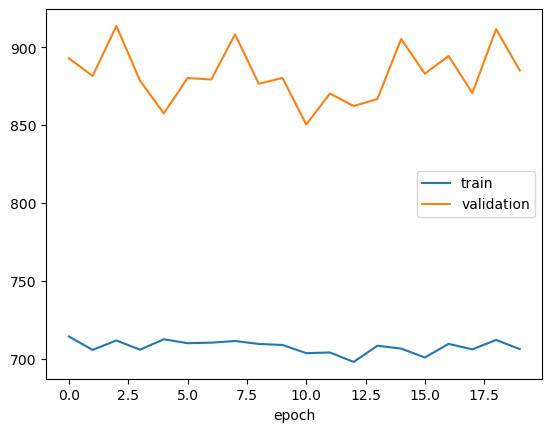

In [33]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [20]:
from NN_library.ConvNet.ConvNet_uniform import *

name = 'NN_library/AutoUnet/AutoUnet_w_Conv_uniform'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_uniform'

Using device: cuda


In [21]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [22]:
unet = AutoUNet()
convnet = ConvNet(16)

In [23]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_uniform', args)

In [24]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_uniform', args)  

In [ ]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

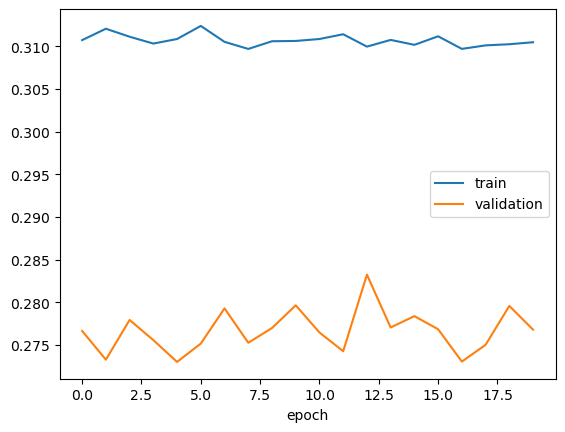

In [23]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])